## Udemy Courses Analysis

### 1. Business Understanding

#### 1.1 *Problem Statement:* The online learning industry is growing rapidly, and Udemy, as a major player, offers a variety of courses across multiple subjects. The challenge is to understand what factors influence the popularity and success of Udemy courses to guide decisions for course creators and platform management.

#### 1.2 *Project Goal:* The goal of this analysis is to provide insights into what makes a course successful on Udemy. This includes understanding which courses attract the most subscribers, how course pricing affects popularity, and which topics are most in-demand. The analysis will also aim to identify trends in course content and performance based on various factors.

#### 1.3 *Stakeholders:*
- Udemy Platform Managers: To optimize the course offering strategy and promote high-demand content.

- Course Creators: To design and price their courses more effectively based on what works well on the platform.

- Marketing Teams: To focus on promoting courses with higher success potential.

- Data Analysts: To derive actionable insights from the data.

#### 1.4 *Key Metrics:*

- Number of Subscribers: A higher number indicates more popular courses.

- Number of Reviews: Represents course engagement and satisfaction.

- Price: Impact of pricing on course enrollment.

- Course Level: To assess if beginners, intermediate, or advanced levels attract more students.

- Subject: Popularity trends across different subject categories.

#### 1.5 Features of the Dataset

- course_id: Unique identifier for each course.

- course_title: The title of the course.

- url: Link to the course on Udemy.

- is_paid: Whether the course is free or paid.

- price: Price of the course (applicable only if it’s a paid course).

- num_subscribers: Number of students enrolled in the course.

- num_reviews: Number of reviews the course received.

- num_lectures: Total number of lectures included in the course.

- level: Course difficulty level (e.g., Beginner, Intermediate, Advanced).

- content_duration: Total length of course content in hours.

- published_timestamp: Date when the course was first published.

- subject: The topic category of the course.

#### 1.6 Null and Alternative Hypothesis

- Null Hypothesis (H0): There is no significant relationship between the price of a course and the number of subscribers it attracts.

- Alternative Hypothesis (H1): There is a significant relationship between the price of a course and the number of subscribers it attracts.

#### 1.7 10 Business Analytical Questions

1. What is the average number of subscribers for free versus paid courses?

2. Does a higher price correlate with more course reviews or better engagement?

3. Which subject areas attract the most subscribers?

4. How does the level of a course (beginner, intermediate, advanced) impact the number of subscribers?

5. Is there a trend in the number of courses published over time?

6. What is the average content duration for courses in each subject?

7. Are courses with more lectures more successful (i.e., more subscribers)?

8. What is the distribution of course prices across different subjects?

9. How do the number of reviews impact course enrollment (subscribers)?

10. Do courses published earlier perform better than recently published courses?


### 2. Data Understanding

#### 2.1 Importing relevant Libraries

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical Analysis and Hypothesis Testing
from scipy import stats
import pingouin as pg
import statsmodels.api as sm
import openpyxl

#### 2.2 Loading Dataset

In [6]:
# File path for the dataset for analysis
file_path = 'C:/Users/HP/AzubiCA/Personal Projects/udemy_courses-1/data/udemy_courses_dataset.xlsx'

# Load the file into the notebook
udemy_data = pd.read_excel(file_path)
udemy_data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


#### 2.3 Expolatory Data Analysis (E.D.A.)

##### 2.3.1 Data Quality Assessment & Exploring Data

In [7]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [8]:
# Exclude course_id, course_title, and url  (assuming no spaces in column names)
exclude_fields = ['course_id', 'course_title', 'url']
desired_fields = [col for col in udemy_data.columns if col not in exclude_fields]

# Iterate through desired fields and display unique values with counts
for field in desired_fields:
    unique_values = udemy_data[field].value_counts()
    print(f"Unique values in '{field}':")
    print(unique_values)
    print("-" * 30)  # Optional separator between fields

Unique values in 'is_paid':
is_paid
True     3368
False     310
Name: count, dtype: int64
------------------------------
Unique values in 'price':
price
20     830
50     468
0      310
200    295
40     217
30     166
25     154
95     152
100    133
195    127
35     116
150     88
45      83
75      81
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: count, dtype: int64
------------------------------
Unique values in 'num_subscribers':
num_subscribers
0       70
1       49
5       28
2       27
3       26
        ..
4449     1
6039     1
1522     1
96       1
901      1
Name: count, Length: 2197, dtype: int64
------------------------------
Unique values in 'num_reviews':
num_reviews
0       289
1       184
2       166
3       160
4       127
       ... 
820       1


In [9]:
# Regularizing each fields of the dataset

udemy_data['content_duration'] = udemy_data['content_duration'].apply(lambda x: round(x, 2)) # Rounding up each value of the field from 6 decimal places to 2 decimal places
udemy_data['price'] = udemy_data['price'].apply(lambda x: round(x, 2)) # Rounding up each value of the field to 2 decimal places

In [11]:
# Convert the 'published_timestamp' field to DateTime datatype (Pandas will handle the 'T' and 'Z' automatically)
udemy_data['published_timestamp'] = pd.to_datetime(udemy_data['published_timestamp'])

# Create a new field with only the date part
udemy_data['published_date'] = udemy_data['published_timestamp'].dt.date

In [17]:
# Creating price ranges for all the prices using appropraite intervals

# Define the bins (including 0 in the first bin)
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

# Define labels for each bin
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200']

# Create a new column 'price_range' using pd.cut() and ensure the lowest value is included
udemy_data['price_range'] = pd.cut(udemy_data['price'], bins = bins, labels = labels, include_lowest = True, right = True)

In [18]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
 12  published_date      

In [19]:
udemy_data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,price_range
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017-01-18,181-200
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017-03-09,61-80
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016-12-19,41-60
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017-05-30,81-100
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016-12-13,181-200


In [20]:
# Exclude course_id, course_title, and url  (assuming no spaces in column names)
exclude_fields = ['course_id', 'course_title', 'url']
desired_fields = [col for col in udemy_data.columns if col not in exclude_fields]

# Iterate through desired fields and display unique values with counts
for field in desired_fields:
    unique_values = udemy_data[field].value_counts()
    print(f"Unique values in '{field}':")
    print(unique_values)
    print("-" * 30)  # Optional separator between fields

Unique values in 'is_paid':
is_paid
True     3368
False     310
Name: count, dtype: int64
------------------------------
Unique values in 'price':
price
20     830
50     468
0      310
200    295
40     217
30     166
25     154
95     152
100    133
195    127
35     116
150     88
45      83
75      81
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: count, dtype: int64
------------------------------
Unique values in 'num_subscribers':
num_subscribers
0       70
1       49
5       28
2       27
3       26
        ..
4449     1
6039     1
1522     1
96       1
901      1
Name: count, Length: 2197, dtype: int64
------------------------------
Unique values in 'num_reviews':
num_reviews
0       289
1       184
2       166
3       160
4       127
       ... 
820       1


In [21]:
udemy_data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
published_date         0
price_range            0
dtype: int64

In [22]:
# Separating Numerical and categorical variables for easy analysis and EDA

cat_cols = udemy_data.select_dtypes(include=['object', 'bool']).columns
num_cols = udemy_data.select_dtypes(include = ['number']).columns.tolist()

print("Categorical Variables:")
print(cat_cols)

print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['course_title', 'url', 'is_paid', 'level', 'subject', 'published_date'], dtype='object')
Numerical Variables:
['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']


##### 2.3.2 Univariate Analysis

In [26]:
udemy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094527,6.053835,0.0,1.0,2.0,4.50,78.5


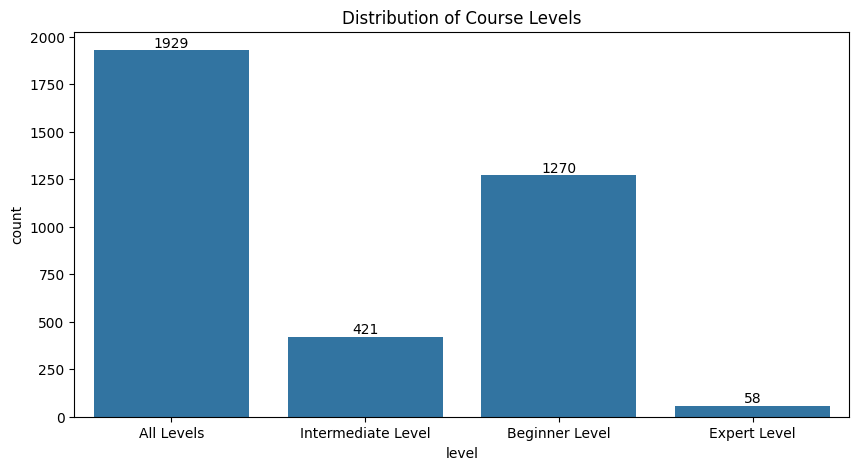

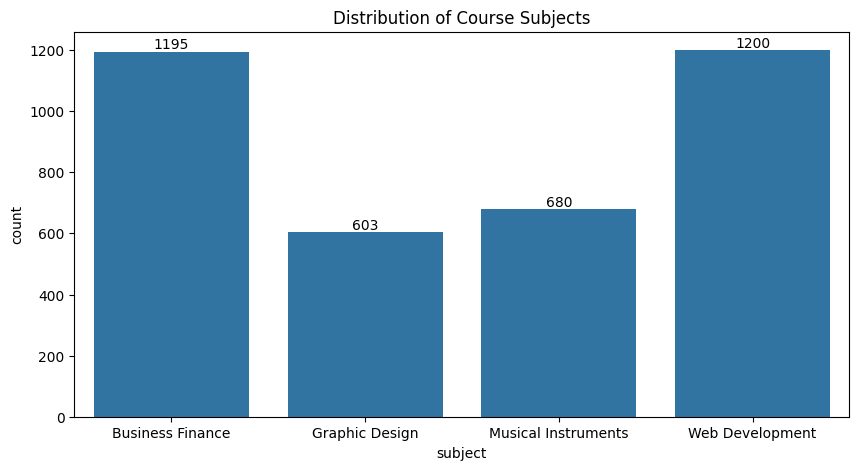

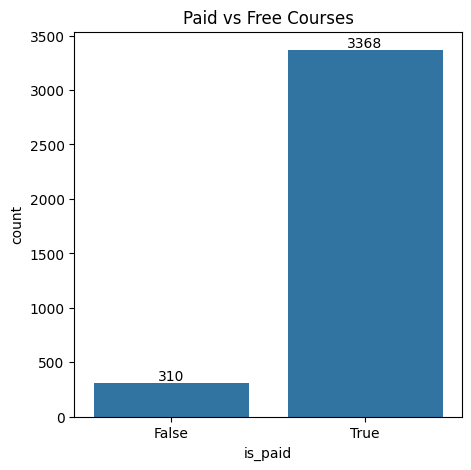

In [28]:
# Distribution of Categorical variables like 'level', 'subject', and 'is_paid'

plt.figure(figsize = (10, 5))
ax1 = sns.countplot(data = udemy_data, x = 'level')
plt.title('Distribution of Course Levels')

# Annotate bars with values
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'bottom')
plt.show()

plt.figure(figsize = (10, 5))
ax2 = sns.countplot(data = udemy_data, x = 'subject')
plt.title('Distribution of Course Subjects')

# Annotate bars with values
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'bottom')
plt.show()

plt.figure(figsize = (5, 5))
ax3 = sns.countplot(data = udemy_data, x = 'is_paid')
plt.title('Paid vs Free Courses')

# Annotate bars with values
for p in ax3.patches:
    ax3.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'bottom')
plt.show()